In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('netflix1.csv')
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.type.describe()

count      8790
unique        2
top       Movie
freq       6126
Name: type, dtype: object

In [5]:
df[df.country == 'India']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"
10,s941,Movie,Motu Patlu: Deep Sea Adventure,Suhas Kadav,India,5/1/2021,2014,TV-Y7,76 min,"Children & Family Movies, Comedies"
11,s942,Movie,Motu Patlu: Mission Moon,Suhas Kadav,India,5/1/2021,2013,TV-Y7,71 min,"Children & Family Movies, Comedies"
29,s25,Movie,Jeans,S. Shankar,India,9/21/2021,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
...,...,...,...,...,...,...,...,...,...,...
8715,s8322,TV Show,The Golden Years with Javed Akhtar,Not Given,India,6/1/2017,2016,TV-G,1 Season,"Docuseries, International TV Shows"
8721,s8350,TV Show,The House That Made Me,Not Given,India,3/31/2017,2015,TV-PG,3 Seasons,"International TV Shows, Reality TV"
8724,s8374,TV Show,The Jungle Book,Not Given,India,5/11/2019,2010,TV-Y7,1 Season,Kids' TV
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,1/15/2017,2015,TV-14,89 min,"Dramas, International Movies"


##### Different types of ratings allowed for children only

In [6]:
df.rating.unique()
children_ratings = ['TV-Y7', 'TV-Y', 'TV-G', 'G', 'TV-Y7-FV']
adult_ratings = ['TV-MA', 'R', 'NC-17']

In [66]:
child_movies = df[ (df.rating == 'TV-Y7') | (df.rating == 'TV-Y') | (df.rating == 'TV-G') | (df.rating == 'TV-Y7-FV') ]

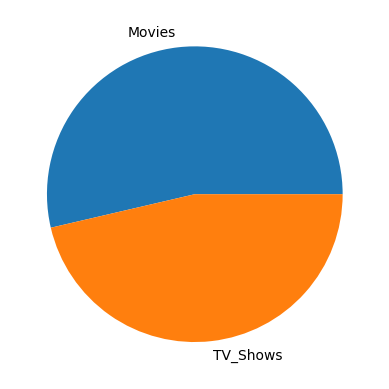

In [64]:
c = plt.pie(x=child_movies.type.value_counts().tolist(),labels=['Movies','TV_Shows'])


#### Movies allowed for adult viewers

In [42]:
adult_movies = df[ (df.rating == 'TV-MA') | (df.rating == 'R') | (df.rating == 'NC-17') ]

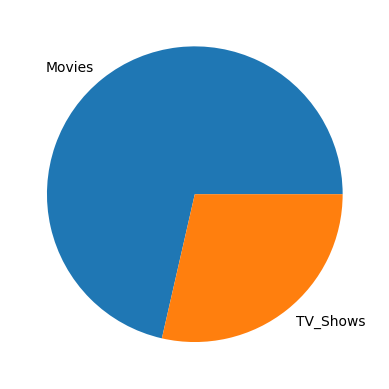

In [67]:
a = plt.pie(x=adult_movies.type.value_counts().tolist(),labels=['Movies','TV_Shows'])

##### Frequency of movies releasing every year

In [9]:
before_2000 = df[df.release_year <= 2000]
after_2000 = df[(df.release_year >= 2000) & (df.release_year <= 2020)]

In [11]:
percent_1 = (before_2000.show_id.count()/df.show_id.count()) * 100
percent_1

6.39362912400455

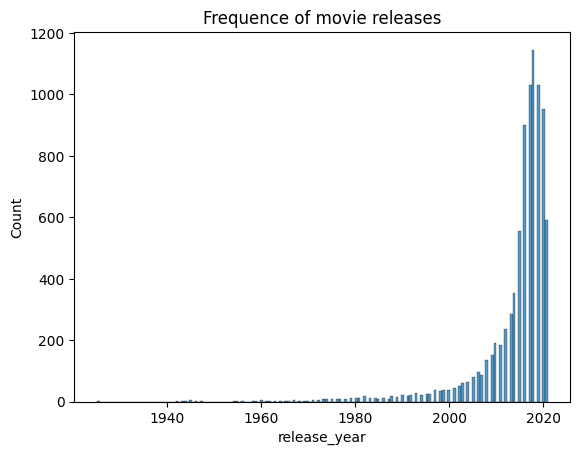

In [ ]:
_ = sns.histplot(data = df, x = 'release_year' ).set_title('Frequence of movie releases')

Text(0.5, 1.0, 'After 2000')

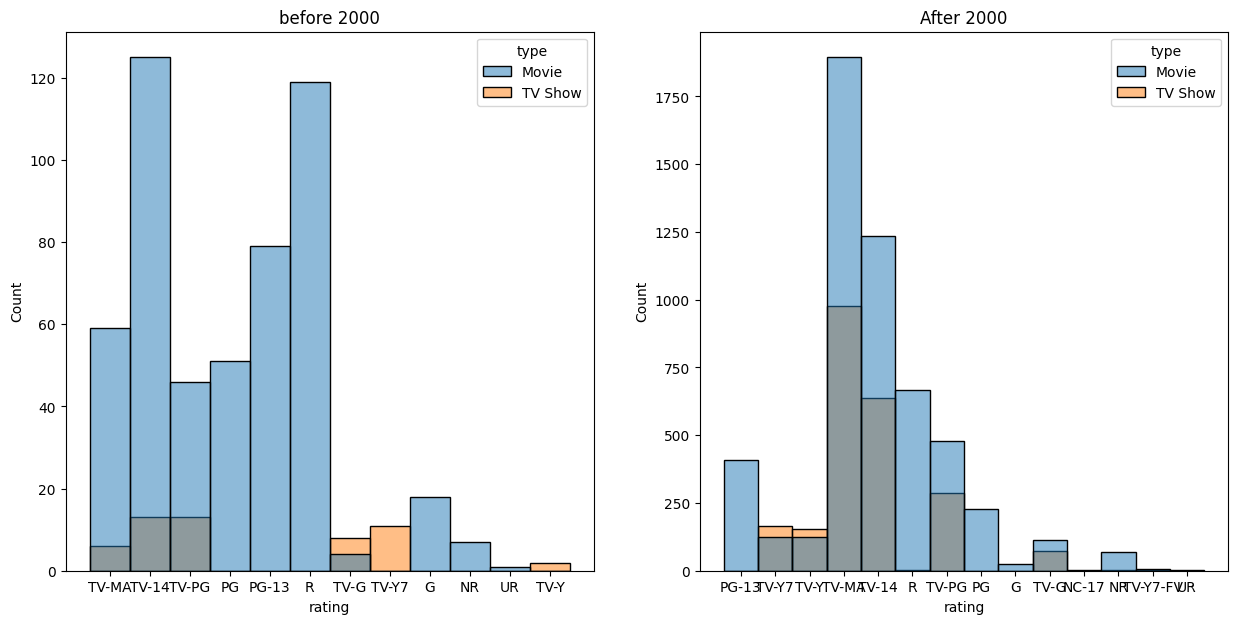

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7))
ax = sns.histplot(data=before_2000, x='rating',hue='type', ax=axes[0], kde=False.302)
ax.set_title('before 2000')

ax = sns.histplot(data=after_2000, x='rating',hue='type', ax=axes[1], kde=False)
ax.set_title('After 2000')

<Axes: xlabel='rating', ylabel='Count'>

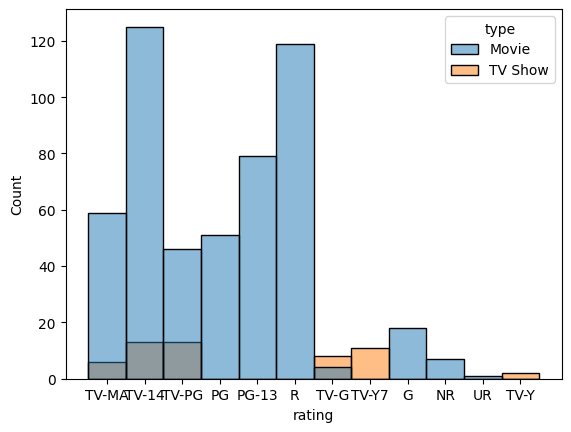

In [ ]:
sns.histplot(data=before_2000, x='rating',hue='type')

<Axes: xlabel='rating', ylabel='Count'>

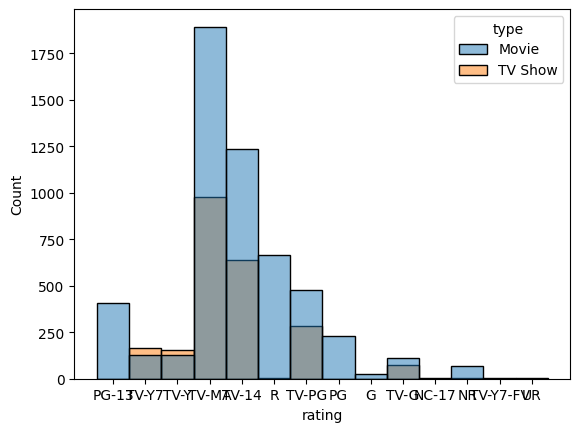

In [ ]:
sns.histplot(data=after_2000, x='rating',hue='type')